In [2]:
!pip install gensim

  Using cached gensim-3.8.3-cp37-cp37m-macosx_10_9_x86_64.whl (24.2 MB)
     |████████████████████████████████| 116 kB 516 kB/s eta 0:00:01
     |████████████████████████████████| 128 kB 2.0 MB/s eta 0:00:01
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)
     |████████████████████████████████| 6.3 MB 2.1 MB/s eta 0:00:01     |████████████████████████████▊   | 5.7 MB 2.1 MB/s eta 0:00:01
  Using cached docutils-0.15.2-py3-none-any.whl (547 kB)
  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110317 sha256=eeff8b6dbfb886f75eb56ef7eda61f35349ba21cbeef3f3638b592230455b6bd
  Stored in directory: /Users/riversoft/Library/Caches/pip/wheels/56/b5/6d/86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
Successfully built smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [21]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul  1 11:41:02 2020

@author: user
"""


from collections import defaultdict
from gensim import corpora
from gensim import models
from gensim import similarities

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]
print('\n-- origin --\n',texts)
# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]
print('\n-- tokenize --\n',texts)
dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]
print('\n-- corpus --\n',corpus)

testcorpus=dictionary.doc2bow(['trees'])
print('\n-- testcorpus --\n',testcorpus)

lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
print('\n-- LSI space --\n',lsi)

doc = "human computer interaction"
#"human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
print('\n-- query_doc --\n',doc.lower().split())
print('\n-- vec_bow --\n',vec_bow)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print('\n-- transformed Vector(through SVD) --\n',vec_lsi)

index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it
#index.save('/tmp/deerwester.index')
#index = similarities.MatrixSimilarity.load('/tmp/deerwester.index')
print('\n-- making indexes (doc,similarity) --\n',type(index))
sims = index[vec_lsi]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples
print('\n-- sorted --\n')
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for i, s in enumerate(sims):
    print(s, documents[i])
    



-- origin --
 [['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'], ['generation', 'random', 'binary', 'unordered', 'trees'], ['intersection', 'graph', 'paths', 'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]

-- tokenize --
 [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]

-- corpus --
 [[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7,

In [8]:
for i in corpus:
    print(i)

[(0, 1), (1, 1), (2, 1)]
[(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
[(2, 1), (5, 1), (7, 1), (8, 1)]
[(1, 1), (5, 2), (8, 1)]
[(3, 1), (6, 1), (7, 1)]
[(9, 1)]
[(9, 1), (10, 1)]
[(9, 1), (10, 1), (11, 1)]
[(4, 1), (10, 1), (11, 1)]


In [19]:
m=[]
n=[]
for i in corpus:
    vec_lsi = lsi[i]
    m.append(vec_lsi[0][1])
    n.append(vec_lsi[1][1])
print(m)
print(n)
    

[0.659466405979739, 2.0245430433828764, 1.5465535813286546, 1.8111412473028834, 0.9336738035634354, 0.012746183038294452, 0.04888203206047036, 0.08063836099410629, 0.2738100392127571]
[0.1421154440372981, -0.4208875824630237, 0.3235891942571183, 0.5890524969932462, -0.27138940499375197, -0.49016179245310415, -1.1129470269929551, -1.5634559463442659, -1.3469415849537707]


[0.659466405979739, 2.0245430433828764, 1.5465535813286546, 1.8111412473028834, 0.9336738035634354, 0.012746183038294452, 0.04888203206047036, 0.08063836099410629, 0.2738100392127571] <class 'list'>
[0.1421154440372981, -0.4208875824630237, 0.3235891942571183, 0.5890524969932462, -0.27138940499375197, -0.49016179245310415, -1.1129470269929551, -1.5634559463442659, -1.3469415849537707] <class 'list'>


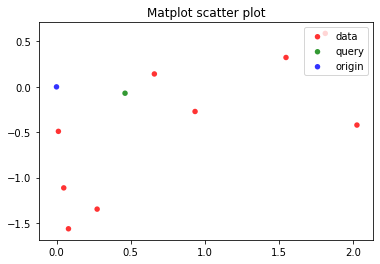

In [22]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 60
g1 = (m,n)
g2 = (0.46182,-0.0700276)
g3 = (0,0)
#g2 = (0.4 + 0.3 * np.random.rand(N), 0.5 * np.random.rand(N))
#g3 = (0.3 * np.random.rand(N), 0.3 * np.random.rand(N))

print(g1[0],type(g1[0]))
print(g1[1],type(g1[1]))
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("data", "query", "origin")

for data, color, group in zip(data, colors, groups):
    x, y = data
    plt.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.legend(loc=1)
plt.title('Matplot scatter plot')
plt.show()